# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis
---

#### <a href="https://taldatech.github.io"> Tal Daniel</a>

## Tutorial 03 - Classical Methods in Statistical Inference - Hypothesis Testing 1
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Hypothesis Testing](#-Hypothesis-Testing)
* [Hypothesis Testing Steps](#-Hypothesis-Testing-Steps)
* [Error Types](#-Error-Types)
* [Example - Body Weight - Z-Statistic](#-Example---Body-Weight---Hypothesis-Testing-for-the-Mean)
* [The Central Limit Theorem (CLT)](#-Reminder:-The-Central-Limit-Theorem-(CLT))
* [Relation to Confidence Intervals](#-Relation-to-Confidence-Intervals)
* [Hypothesis Testing for the Mean Summary](#-Hypothesis-Testing-for-the-Mean-Summary)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### <img src="https://img.icons8.com/bubbles/50/000000/test-tube.png" style="height:50px;display:inline"> Hypothesis Testing
---
Let's begin with an example: consider a radar system that uses radio waves to detect aircrafts. The system receives a signal, and based on the received signal, it needs to decide whether an aircraft is present or not. We formulate two hypotheses:
1. $H_0$: No aircraft is present.
2. $H_1$: An aircraft is present.

$H_0$ is called the **null hypothesis** (also: the *default hypothesis*) and $H_1$ is called the **alternative hypothesis**. We initially assume that $H_0$ is **true** and based on the observed data we need to decide whether or not to accept $H_1$ or reject it.

### <img src="https://img.icons8.com/dusk/64/000000/workflow.png" style="height:50px;display:inline"> Hypothesis Testing Steps
---
#### Step 1
---
**Null & Alternative Hypotheses** -  Formulate the null hypothesis $H_0$: $\theta \in \Theta_0$ (that the observations are the result of pure chance) and the alternative hypothesis $H_1$: $\theta \in \Theta_1$ (that the observations show a real effect combined with a component of chance variation).

#### Step 2
---
**Test Statistic** - Identify a test statistic that can be used to assess the truth of the null hypothesis. It is a value computed from sample data. The test statistic is used to assess the strength of evidence in support of a null hypothesis.
   * A **statistic** is a real-valued function of the data. For example, the sample mean: $W(X_1, X_2,..., X_n)= \frac{X_1 + X_2 + ... + X_n}{n}$ is a statistic.
   * A **test satistic** is a statistic on we which we build our test.
   * **Acceptence Region** $A$ - A *set* $A \subset \mathbb{R}$ is defined to be the set of all possible values of the test statistic for which we accept $H_0$.
   * **Rejection Region** $R$ - A *set*  $R = \mathbb{R} - A$ is defined to be the set of all possible values of the test statistic for which we reject $H_0$ and accept $H_1$.

#### Step 3
---
**P-value & Interpretation** - Compute the P-value, which is the probability that a test statistic, at least as significant as the one observed, would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence **against** the null hypothesis.

#### Step 4
---
**Significance Level** - Compare the p-value to an acceptable significance value $\alpha$ (sometimes called an $\alpha$ value, a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%.). If $p \leq \alpha$ (the observed effect is statistically significant), the null hypothesis is ruled out, and the alternative hypothesis is valid.

#### <img src="https://img.icons8.com/ios/100/000000/battle.png" style="height:30px;display:inline"> The Two Competing Theories
---
* **NULL** Hypothesis - $H_0$ - any observed deviation from what we expect to see is due to chance variability.
* **ALTERNATIVE** Hypothesis - $H_a$ - 'claim', or a theory you wish to test (the reason for the observed statistic).

$H_0$ is assumed **true** until enough evidence goes against it (we then refute it and believe the alternative $H_a$).


### <img src="https://img.icons8.com/bubbles/50/000000/close-window.png" style="height:50px;display:inline"> Error Types
---
<img src="./assets/tut_01_error_types.jpg" style="height:300px">

* **Type I Error (False Positive)** -  the incorrect rejection of a true null hypothesis. Usually a type I error leads one to conclude that a supposed effect or relationship exists when in fact it doesn't. 
    * For example, a test that shows a patient to have a disease when in fact the patient does not have the disease, a fire alarm going on indicating a fire when in fact there is no fire, or an experiment indicating that a medical treatment should cure a disease when in fact it does not.
    * The chance of **rejecting the null hypthesis $H_0$, when it is TRUE**, denoted by $\alpha$
    * $\rightarrow$ the chance of **accepting the null hypthesis $H_0$, when it is TRUE** is $1 - \alpha$
    * Formally:
        * Denote a *test statistic* as $W$
        * $P(\text{Type 1 Error} | \theta) = P(\text{Reject } H_0|\theta) = P(W \in R | \theta), \theta \in \Theta_0$
            * If $P(\text{Type 1 Error} | \theta) \leq \alpha, \forall \theta \in \Theta_0$, we say that the test has **significance level** $\alpha$.

* **Type II Error (False Negative)** - the failure to reject a false null hypothesis.
    * For example, a blood test failing to detect the disease it was designed to detect, in a patient who really has the disease; a fire breaking out and the fire alarm does not ring; or a clinical trial of a medical treatment failing to show that the treatment works when really it does.
    * The chance of **not rejecting the null hypothesis $H_0$, when it is FALSE**, denoted by $\beta$
    * $\rightarrow$ the chance of **rejecting the null hypthesis $H_0$, when it is FALSE** is $1 - \beta$ (also called **power**)
    * Since the alternative hypothesis, $H_1$, usually contains more than one value of $\theta$, the probability of type II error is usually a **function of $\theta$**, and denoted by $\beta$.
    * Formally: $\beta(\theta) = P(\text{Accept } H_0 | \theta), \text{ for } \theta \in \Theta_1$

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:20px;display:inline"> Example - Error Types
---
* Hypothesis: "A patient's symptoms improve after treatment A more rapidly than after a placebo treatment."

* Null hypothesis ($H_0$): "A patient's symptoms after treatment A are indistinguishable from a placebo."

* A Type I error would falsely indicate that treatment A is more effective than the placebo, whereas a Type II error would be a failure to demonstrate that treatment A is more effective than placebo even though it actually is more effective.

### <img src="https://img.icons8.com/doodle/96/000000/body-measurements.png" style="height:50px;display:inline"> Example - Body Weight - Hypothesis Testing for the Mean
---
The following example will be used to demonstrate the statistic process:

In the 1970s, 20–29 year old men in the U.S. had a mean $\mu$ body weight of 170 pounds (77 kg). Standard deviation $\sigma$ was 40 pounds (18 kg). We test whether mean body weight in the population is **bigger** now.

#### 1- Null & Alternative Hypotheses 
---
* Under the **null hypothesis** there is no difference in the mean body weight between then and now, in which case $\mu$ would still equal 170 pounds: $$H_0: \mu=170$$
* Under the **alternative hypothesis**, the mean weight has increased: $$H_a: \mu > 170$$
    * This statement of the alternative hypothesis is **one-sided**. That is, it looks only for values larger than stated under the null hypothesis.
    * There is another way to state the alternative hypothesis. We could state it in a **“two-sided”** manner, looking for values that are either higher- or lower-than expected. For the current illustrative example, the two-sided alternative is $H_a: \mu \neq 170$. Although for the current illustrative example, this seems unnecessary, two-sided alternative offers several advantages and are much more common in practice.

#### 2- Test Statistic (TS)
---
* It is a measure of how far the observed data is from what is expected under the null hypothesis $H_0$.
    * Compute the value of a test statistic (TS) from the data.
* The particular TS computed depends on the tested parameter.
    * For example, to test the population mean, the TS is the sample mean (or standardized sample mean), if the variance is known.
    * It is very similar to the process we did in point estimation, for choosing the correct estimator.
* The null hypothesis $H_0$ is rejected if the TS falls in a user-specified rejection region.
* Different hypothesis tests use different test statistics based on the probability model assumed in the null hypothesis. Common tests and their test statistics include:

| Hypothesis Test | Test Statistic |
| ---------- | ---------- |
|<center> Z-test </center>| <center> Z-statistic </center>|
|<center> t-tests </center>|<center> t-statistic</center>|
|<center> ANOVA</center>| <center> F-statistic </center>|
|<center> Chi-square tests</center>| <center> Chi-square statistic </center>|

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:20px;display:inline"> Example - TS - Z-statistic
---
The Z-statistic has the standard normal distribution under the null hypothesis. It is a **mean** test when $\sigma$ is known. We will use this statistic to test the problem: $$z_{stat} = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}} $$ 

Assumptions:
* $\mu_0$ is the **population mean** assuming $H_0$ is **true**
* $\overline{x} = \frac{x_1 + x_2 +.. +x_n}{n}$ is the sample mean.
* $\sigma_{\overline{x}} = \frac{\sigma}{\sqrt{n}}$

Solve for the "Body Weight" problem:
* $\mu_0 =170$
* $\sigma = 40$
* We'll take sample size of $n=64 $ samples, $\rightarrow \sqrt{n} = 8$
* $\sigma_{\overline{x}} = \frac{40}{8} = 5 $
    * If the **variance is unknown** (the variance of $X_i$): we use the **sample standard deviation** $S$ instead of $\sigma$ (unbiased) $$S = \sqrt{\frac{1}{n-1}\sum_{k=1}^n(X_k - \overline{X})^2} = \sqrt{\frac{1}{n-1}\big(\sum_{k=1}^nX_k^2 -n\overline{X}^2\big)}$$ 
    * Note that you first estimate the variance for the **whole** population, and then still devide by $\sqrt{n}$ to get the sample STD for $z_{stat}$. 
    * <a href="https://www.probabilitycourse.com/chapter8/8_4_3_hypothesis_testing_for_mean.php">Read more (examples + exercises)</a>.

Now, let's assume we found a sample mean of **173**, then:
* $z_{stat} = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}} = \frac{173 - 170}{5} = 0.6$

Now, let's assume we found a sample mean of **185**, then:
* $z_{stat} = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}} = \frac{185 - 170}{5} = 3$

### <img src="https://img.icons8.com/dusk/64/000000/alarm.png" style="height:30px;display:inline"> Reminder: The Central Limit Theorem (CLT)
---
* The CLT states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. 
* When $n$ is large, the distribution of the **sample means** will approach a normal distribution. More formally:

If $X_1, X_2, ..., X_n$ is a random sample of size $n$ taken from a population with mean $\mu$ and variance $\sigma^2$, and if $\overline{X}$ is the sample mean, the limiting form of the distribution: $$ Z = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} $$ as $n \rightarrow \infty $, is the **standard normal distribution**

<a href="http://onlinestatbook.com/stat_sim/sampling_dist/">CLT DEMO</a>

#### Reasoning Behind $z_{stat}$
---
Sampling distribution of $\overline{x}$ under $H_0$: $$ \overline{x} \sim N(170, 5) $$
<img src="./assets/tut_01_z_stat.jpg" style="height:200px">

#### 3 - P-value & Interpretation
---
* All hypothesis tests ultimately use a **p-value** to weigh the strength of the evidence (what the data are telling you about the population). The p-value is a number between 0 and 1, and is **the probability of the observed test statistic (or one more extreme) when $H_0$ is true**
    * **P-value** is the *lowest* significance level $\alpha$ that results in rejecting the null hypothesis. 
* It corresponds to the **Area Under the Curve (AUC)** in the tail of the Standard Normal Distribution beyond the $z_{stat}$
* Converting Z-statistics to *P-value*:  $$\textit{For } H_1: \mu > \mu_0 \rightarrow P = Pr(Z > z_{stat}) = \textit{right-tail beyond } z_{stat} $$

<img src="./assets/tut_01_p_value.png" style="height:300px">


* <a href="https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/hypothesis-test-for-a-population-proportion-2-of-3/">Image Source</a>

In [3]:
# let's see for the body weight problem
x = np.linspace(140, 200, 64)
mu = 170  # H_0 is true!
sigma = 5  # calcualted for 64 samples
f_x = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_normed = (x - mu) / sigma

p-val (AUC) = 0.298


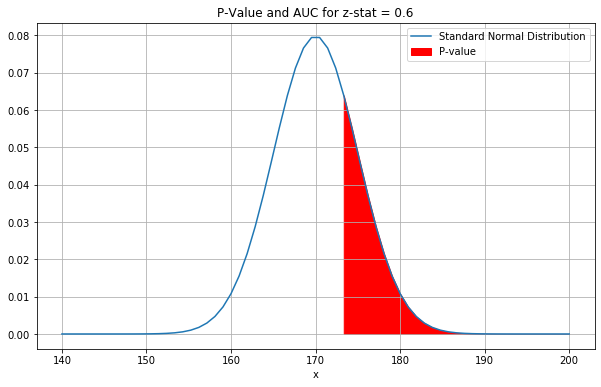

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, f_x, label='Standard Normal Distribution')
ax.fill_between(x[np.where(x.astype(int)==173)[0][0]:], y1=f_x[np.where(x.astype(int)==173)[0][0]:],
                color='red', label="P-value")
ax.grid()
ax.legend()
ax.set_xlabel('x')
ax.set_title('P-Value and AUC for z-stat = 0.6')
p_val = np.sum(f_x[np.where(x.astype(int)==173)[0][0]:])
print('p-val (AUC) = {:.3f}'.format(p_val))

In [9]:
# let's see for the body weight problem
x = np.linspace(140, 200, 64)
mu = 170  # H_0 is true!
sigma = 5  # calcualted for 64 samples
f_x = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_normed = (x - mu) / sigma

def plot_p_auc():
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, f_x, label='Standard Normal Distribution')
    ax.fill_between(x[np.where(x.astype(int)==185)[0][0]:], y1=f_x[np.where(x.astype(int)==185)[0][0]:],
                    color='red', label="P-value")
    ax.grid()
    ax.legend()
    ax.set_xlim([170, 195])
    ax.set_ylim([0, 0.05])
    ax.set_xlabel('x')
    ax.set_title('P-Value and AUC for z-stat = 3.0')
    p_val = np.sum(f_x[np.where(x.astype(int)==185)[0][0]:])
    print('p-val (AUC) = {:.3f}'.format(p_val))

p-val (AUC) = 0.001


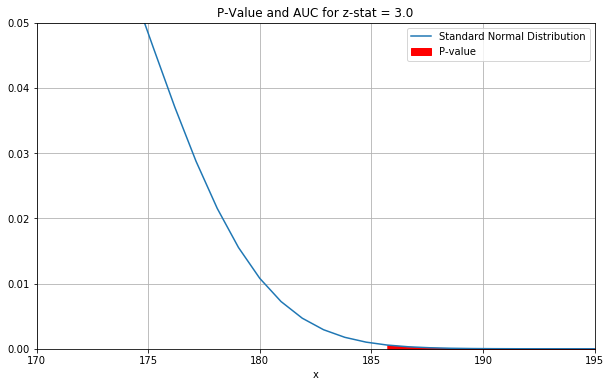

In [10]:
plot_p_auc()

#### Interpretation
---
* A small p-value (typically ≤ 0.05) indicates **strong evidence against the null hypothesis $H_0$**, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

* p-values very close to the cutoff (0.05) are considered to be marginal (could go either way).

#### 4- Significance Level ($\alpha$)
---
* It is the degree of certainty required in order to **reject** the null hypothesis $H_0$.
* A test statistic, TS, with p-value **less** than some pre-determined false positive (or size) is said to be statistically significant at that level.
* Commonly used p-values:

|<center> P-Value &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </center> |<center> Wording </center>|
| -----------------------------------------| --------------- |
|<center> $p > 0.05$ </center>| <center> Not Significant </center>|
|<center> $0.01 \leq p \leq 0.05$ </center>|<center> Significant</center>|
|<center> $0.001 \leq p < 0.01$</center>| <center> Very Significant </center>|
|<center> $p < 0.001$</center>| <center> Extremely Significant </center>|


#### <img src="https://img.icons8.com/cotton/64/000000/tie.png" style="height:30px;display:inline"> Formalization
---
Let's design a level $\alpha$ test to choose between: $$ H_0: \mu= \mu_0 $$ $$ H_1: \mu \neq \mu_0$$
We initially assume $H_0$, thus $z_{stat} \sim \mathcal{N}(0,1)$. We will choose a threshold $c$. If $|z_{stat}| \leq c$, we **accept** $H_0$, and if $|z_{stat}| > c$, accept $H_1$.

To choose $c$: $$ P(|z_{stat}| >c | H_0) = \alpha $$
Since the standard normal PDF is **symmetric** around $0$, we have: $$ P(|z_{stat}| >c | H_0) = 2P(z_{stat} > c| H_0) \rightarrow P(z_{stat} > c| H_0) = \frac{\alpha}{2} \rightarrow c=z_{\frac{\alpha}{2}}$$
Therefore, we accept $H_0$ if $$ \mid\frac{\overline{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}\mid \leq z_{\frac{\alpha}{2}} $$ and reject it otherwise.

#### <img src="https://img.icons8.com/dusk/64/000000/trust.png" style="height:30px;display:inline"> Relation to Confidence Intervals
---
Notice that saying we accept $H_0$ if  $$ \mid\frac{\overline{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}\mid \leq z_{\frac{\alpha}{2}} $$ can be interpreted as the following **acceptance region** for $\mu_0$: $$ \mu_0 \in \big[ \overline{X}-  z_{\frac{\alpha}{2}}\cdot \frac{\sigma}{\sqrt{n}}, \overline{X}+  z_{\frac{\alpha}{2}}\cdot \frac{\sigma}{\sqrt{n}}\big] $$ Which is the $(1-\alpha)$ confidence interval for $\mu_0$. 

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Hypothesis Testing
---
We continue with the radar example. Recall that the system receives a signal and based upon that signal it decides whether an aircraft is present or not. We denote:
* $X$ - the received signal (R.V., sampled)
* We suppose that: $$ X=W, \text{   if no aircraft is present} $$ $$ X=1+W, \text{   if an aircraft is present} $$ $$ W \sim \mathcal{N}(0,\sigma^2=\frac{1}{9}) $$
* We can write instead: $$X = \theta + W$$ where $\theta=0$ if there is no aircraft and $\theta=1$ otherwise.
* The **hypotheses**: 
    * $H_0$ (null): No aircraft is present
    * $H_1$ (alternative): An aircraft is present

1. Write $H_0$ and $H_1$ in terms of possible values of $\theta$.
2. Suggest a *simple* test statistic with level $\alpha = 0.05$ to decide between $H_0$ and $H_1$.
3. Find the probability of missing a present aircraft, that is, find $\beta$ (the probability of type 2 error).
4. If we observe $X=0.6$, is there enough evidence to reject $H_0$ at a *significance level* $\alpha=0.01$?
5. For a probability less than 5% to miss a present aircraft, what is the **smallest** significance level that we can achieve?


* Reminder: $$W \sim \mathcal{N}(\mu, \sigma^2) \rightarrow \frac{W - \mu}{\sigma} \sim \mathcal{N}(0,1)$$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
---
#### Section 1 - Write $H_0$ and $H_1$ in terms of possible values of $\theta$.
---
The **hypotheses**: 
   * $H_0$ (null): No aircraft is present: $\theta=0$
   * $H_1$ (alternative): An aircraft is present : $\theta=1$

#### Section 2 - Suggest a *simple* test statistic with level $\alpha = 0.05$ to decide between $H_0$ and $H_1$.
---
* The *observed* data is a random variable $X$. 
* Under $H_0$ we have $X \sim \mathcal{N}(0, \frac{1}{9})$ and under $H_1$ we have $X \sim \mathcal{N}(1, \frac{1}{9})$. 
* We suggest the following test: set a threshold $c$. If the obsereved value of $X$ is less than $c$, choose $H_0$ ($\theta=\mathbb{E}[X]=0$), otherwise, choose $H_1$ ($\theta=\mathbb{E}[X]=1$). 
* To find the best $c$ we use the required $\alpha$, that is, we demand: $$ P(\text{type I error}) = P(\text{Reject } H_0 | H_0) = P(X>c|H_0) = P(W>c) =P(\frac{Z}{3} > c) = 1 - \phi(3c) =\alpha$$ (the last transition is due to the fact that we assume $H_0$ and $X \sim \mathcal{N}(0, \frac{1}{9})$, which is not the standard distribution). 
* It holds that $P(\text{type I error}) = \alpha$, thus we get: $$ c=\frac{1}{3}\phi^{-1}(1- \alpha) = \frac{1}{3}\phi^{-1}(1-0.05) = \frac{1}{3}\phi^{-1}(0.95) = 0.548 $$

#### Section 3 - Find the probability of missing a present aircraft, that is, find $\beta$ (the probability of type 2 error).
---
Note that the *alternative* hypothesis is simple, that is, it contains only one value ($\theta = 1$), so $\beta(\theta) = \beta$ and we can write: $$ \beta = P(\text{type II error}) = P(\text{Accept } H_0 | H_1) = P(X < c | H_1) = P(1+W < c) = P(W<c-1) = \phi(3(c-1)) $$ Since we found out that for the given $\alpha$, $c=0.548$ then $\beta = 0.088$.

#### Section 4 - If we observe $X=0.6$, is there enough evidence to reject $H_0$ at a *significance level* $\alpha=0.01$?
---
* For $\alpha=0.01$ we get $ c=\frac{1}{3}\phi^{-1}(1- \alpha) = \frac{1}{3}\phi^{-1}(1-0.01) = \frac{1}{3}\phi^{-1}(0.99) = 0.775$, which is **larger** than $0.6$. 
* Thus, we **cannot** reject $H_0$ at significance level $\alpha=0.01$.

#### Section 5 - For a probability less than 5% to miss a present aircraft, what is the **smallest** significance level that we can achieve?
---
We want $\beta = 0.05$, and from (3) we deduce that $c=1 + \frac{1}{3}\phi^{-1}(\beta)=0.452$. Thus, we need $c \leq 0.452$ to obtain $\beta \leq 0.05)$. Let's calculate $\alpha$: $$ P(\text{type I error}) = P(\text{Reject } H_0 | H_0) = 1 - \phi(3c) = 0.0875 $$ which means that the smallest significance level that we can achieve is 0.0875.

#### <img src="https://img.icons8.com/nolan/64/000000/table-1.png" style="height:30px;display:inline"> Hypothesis Testing for the Mean Summary
---
All expansions can be found <a href="https://www.probabilitycourse.com/chapter8/8_4_3_hypothesis_testing_for_mean.php">HERE</a>.

* 2-sided hypothesis testing for the mean: $H_0: \mu=\mu_0, H_1: \mu \neq \mu_0$

| <center>Case </center>  | Test Statistic | Acceptance Region |
| ------ | --- | --- |
| $X_i \sim \mathcal{N}(\mu, \sigma)$, $\sigma$ **known** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{\sigma}{\sqrt{n}}}$| $\mid W \mid \leq z_{\frac{\alpha}{2}} $  |
|$n$ large, $X_i$ non-normal &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{S}{\sqrt{n}}}$| $\mid W\mid \leq z_{\frac{\alpha}{2}} $  |



* 1-sided hypothesis testing for the mean: $H_0: \mu \leq \mu_0, H_1: \mu > \mu_0$

| <center>Case </center>  | Test Statistic | Acceptance Region |
| ------ | --- | --- |
| $X_i \sim \mathcal{N}(\mu, \sigma)$, $\sigma$ **known** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{\sigma}{\sqrt{n}}}$| $W \leq z_{\alpha} $  |
|$n$ large, $X_i$ non-normal &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{S}{\sqrt{n}}}$| $W \leq z_{\alpha} $  |

* The only difference is the *absolute* sign on $W$

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Hypothesis Testing - <a href="https://www.youtube.com/watch?v=VK-rnA3-41c">Hypothesis Testing Statistics Problems & Examples</a>
* p-Value - <a href="https://www.youtube.com/watch?v=eyknGvncKLw">Understanding the p-value - Statistics Help</a>
    * <a href="https://www.youtube.com/watch?v=-MKT3yLDkqk">What is a P Value? What does it tell us?</a>
* Test Statistics (t-stat is covered in the next tutorial):
    * <a href="https://www.youtube.com/watch?v=QZ7kgmhdIwA">Test Statistics: Crash Course Statistics</a>
    * <a href="https://www.youtube.com/watch?v=5ABpqVSx33I">Z-statistics vs. T-statistics</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Examples, exercises and definitions from <a href="https://probabilitycourse.com/">Introduction to Probability, Statistics and Random Processes</a> - https://probabilitycourse.com
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/